
Alunos:
  * Arthur Breno dos Reis Paula - 12547382
  * Fernando - 8556609
  * Mateus Israel Silva - 11735042

# Desafio: **Porto Seguro's Safe Driver Prediction**

OBJETIVO:
 - Calcular a probabilidade de um seguro automotivo ser acionado

# Biliotecas importadas

In [30]:
## Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imputção de dados
from sklearn.impute import KNNImputer

## Decomposição
from sklearn.decomposition import PCA

## Pre processamento
from sklearn.preprocessing import StandardScaler


## Pre processamento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Selecao de modelos
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# Avaliar classificador
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import xgboost as xgb

Configuração gráfica

In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

Importação dos dados

In [4]:
path = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/train_under_sample.csv'

In [8]:
dados = pd.read_csv(path)
# dados_brutos_teste = pd.read_csv(path_test)

In [10]:
dados.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,0,1,3,0,0,1,0,0,0,0,...,1,2,5,0,1,1,0,0,0,0
1,1,1,2,0,0,1,0,0,0,0,...,3,2,7,0,1,1,0,0,1,0
2,1,1,2,0,0,1,0,0,0,0,...,2,3,8,0,0,0,0,1,0,0
3,0,1,1,0,0,1,0,0,0,0,...,1,1,8,0,0,0,1,0,0,0
4,1,1,3,1,0,0,1,0,0,0,...,2,4,5,0,1,0,0,0,0,0


In [11]:
from collections import Counter

In [13]:
Counter(dados.iloc[:,-1])

Counter({0: 19150, 1: 19150})

---

# Modelos de Aprendizado de Máquina

## Importando bibliotecas

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Modelos:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

In [15]:
X = dados.iloc[:, :-1]
y = dados.iloc[:, -1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Regressão Logística

In [25]:
param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['saga'], 
        'random_state': [42],
        'max_iter': [500]
    }, 
    {
        'penalty': ['l2'], 
        'solver': ['lbfgs', 'saga', 'sag', 'newton-cholesky', 'newton-cg'], 
        'random_state': [42],
        'max_iter': [500]
    },
    {
        'penalty': ['elasticnet'], 
        'solver': ['saga'], 
        'l1_ratio': [0.5],
        'random_state': [42],
        'max_iter': [500]
    }    
]

In [26]:
estimator = LogisticRegression()
cv = 3

In [27]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [28]:
clf.fit(X_train, y_train)

/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'max_iter': [500], 'penalty': ['l1'],
                          'random_state': [42], 'solver': ['saga']},
                         {'max_iter': [500], 'penalty': ['l2'],
                          'random_state': [42],
                          'solver': ['lbfgs', 'saga', 'sag', 'newton-cholesky',
                                     'newton-cg']},
                         {'l1_ratio': [0.5], 'max_iter': [500],
                          'penalty': ['elasticnet'], 'random_state': [42],
                          'solver': ['saga']}],
             scoring='f1')

Predição:

In [29]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [31]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      5753
           1       0.81      0.73      0.77      5737

    accuracy                           0.78     11490
   macro avg       0.78      0.78      0.78     11490
weighted avg       0.78      0.78      0.78     11490



<Axes: >

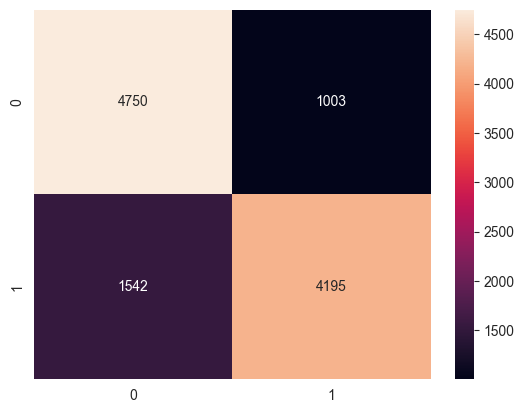

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='.0f')

In [35]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.7785
AUC: 0.8556


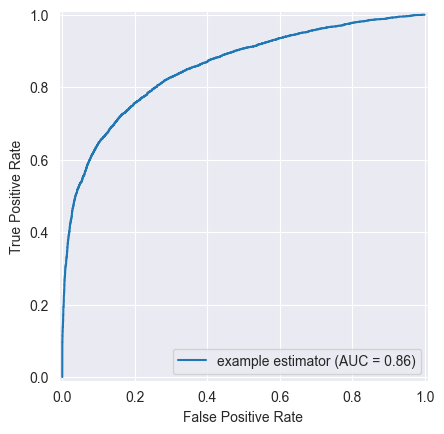

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## Random Forest

In [60]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

In [62]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.8426
AUC: 0.9182


## Gradient Boosting Classifier

In [63]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [64]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

In [65]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.8578
AUC: 0.9311


## KNN

In [66]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

In [68]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.7017
AUC: 0.7451


## SVM

In [69]:
model = SVC(kernel='linear')

model.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [ ]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')